## Mental Health Survey Analysis

### Installing libraries

In [2]:
!pip install -U textblob


### Data Loading and Exploration

In [3]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Rick-Royal\Documents\Strathmore University Data Science and Analytics\Module 4\Module-IV\Communication\archive\survey.csv')
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [5]:
data.shape

(1259, 27)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

The comment column has 164 non-null entries out of 1259 entries. We will use the 169 entries in the comments column to to conduct sentiment analysis. For the survey results:

The treatment column has two unique values: 'Yes' and 'No', indicating whether someone has sought treatment for a mental health condition.
The mental_health_consequence column has three unique values: 'No', 'Maybe', and 'Yes', representing the perceived consequences of discussing a mental health issue with one's employer.
Given this, we can use the mental_health_consequence column as a reference for comparison since it seems to have a sentiment-like structure (Yes might be perceived as negative, Maybe as neutral, and No as positive in terms of discussing mental health issues at work).

### Sentiment Analysis of Comments

In [7]:

from textblob import TextBlob

def sentiment_analysis(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

data_comments = data[data['comments'].notna()]
data_comments['sentiment'] = data_comments['comments'].apply(sentiment_analysis)
data_comments[['comments', 'sentiment']].head()


C:\Users\Rick-Royal\AppData\Local\Temp\ipykernel_15860\2587928426.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_comments['sentiment'] = data_comments['comments'].apply(sentiment_analysis)


,comments,sentiment
13,I'm not on my company's health insurance which...,positive
15,I have chronic low-level neurological issues t...,positive
16,My company does provide healthcare but not to ...,negative
24,Relatively new job. Ask again later,positive
25,Sometimes I think about using drugs for my me...,positive


### Visualization and Comparison

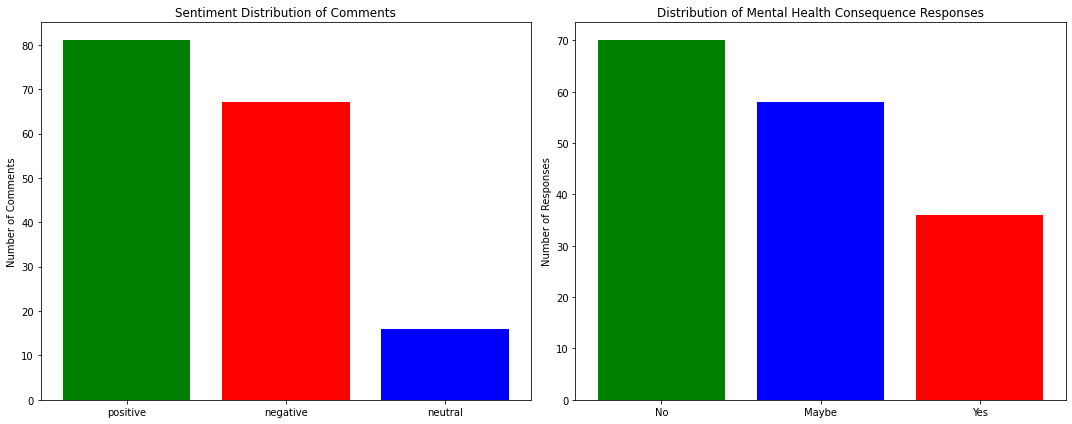

In [8]:

import matplotlib.pyplot as plt

sentiment_distribution = data_comments['sentiment'].value_counts()
mental_health_consequence_distribution = data_comments['mental_health_consequence'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].bar(sentiment_distribution.index, sentiment_distribution.values, color=['green', 'red', 'blue'])
ax[0].set_title('Sentiment Distribution of Comments')
ax[0].set_ylabel('Number of Comments')

ax[1].bar(mental_health_consequence_distribution.index, mental_health_consequence_distribution.values, color=['green', 'blue', 'red'])
ax[1].set_title('Distribution of Mental Health Consequence Responses')
ax[1].set_ylabel('Number of Responses')

plt.tight_layout()
plt.show()



### Summary:
- The comments in the dataset mostly have a positive sentiment.
- However, when it comes to discussing mental health issues at work, there's a significant portion of respondents who believe there might be negative consequences or are unsure.
- Further analysis could involve diving deeper into the comments to understand the themes or topics discussed or further comparisons with other survey questions to glean more insights.


C:\Users\Rick-Royal\AppData\Local\Temp\ipykernel_15860\105486229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_comments['sentiment'] = data_comments['comments'].apply(sentiment_analysis)


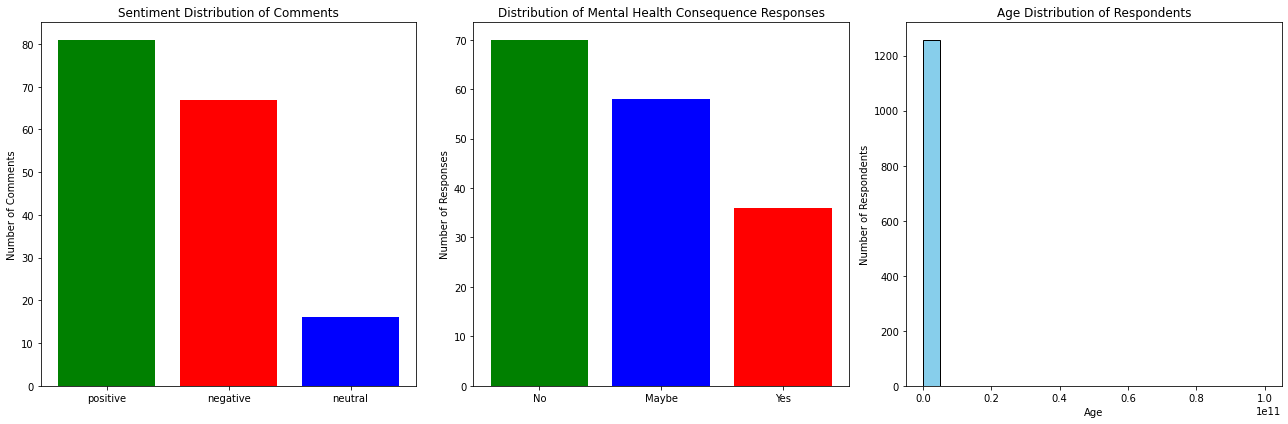

In [9]:
# Sentiment distribution of comments
data_comments = data[data['comments'].notna()]
data_comments['sentiment'] = data_comments['comments'].apply(sentiment_analysis)
sentiment_distribution = data_comments['sentiment'].value_counts()

# Distribution in the 'mental_health_consequence' column
mental_health_consequence_distribution = data_comments['mental_health_consequence'].value_counts()

# Age distribution
ages = data['Age']

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Sentiment distribution of comments
ax[0].bar(sentiment_distribution.index, sentiment_distribution.values, color=['green', 'red', 'blue'])
ax[0].set_title('Sentiment Distribution of Comments')
ax[0].set_ylabel('Number of Comments')

# Distribution in the 'mental_health_consequence' column
ax[1].bar(mental_health_consequence_distribution.index, mental_health_consequence_distribution.values, color=['green', 'blue', 'red'])
ax[1].set_title('Distribution of Mental Health Consequence Responses')
ax[1].set_ylabel('Number of Responses')

# Age distribution of respondents
ax[2].hist(ages, bins=20, color='skyblue', edgecolor='black')
ax[2].set_title('Age Distribution of Respondents')
ax[2].set_xlabel('Age')
ax[2].set_ylabel('Number of Respondents')

plt.tight_layout()
plt.show()

In [10]:
!pip install pandas plotly bokeh


  Obtaining dependency information for bokeh from https://files.pythonhosted.org/packages/84/60/33f23dbb15fcd785d6287bdd6fa8c9d836dacb40e21c14aad41a57a0ec0f/bokeh-3.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for xyzservices>=2021.09.1 from https://files.pythonhosted.org/packages/b1/2b/53fa918ab16998937586f33d14cb00fbf04ead7425c96b665b73b09c7d64/xyzservices-2023.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 7.8/7.8 MB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 57.2/57.2 kB 1.5 MB/s eta 0:00:00


In [14]:
import pandas as pd
from bokeh.io import output_file, show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from textblob import TextBlob
import numpy as np

# # Load dataset and preprocess
# data = pd.read_csv('path_to_survey.csv')

# Function for sentiment analysis
def sentiment_analysis(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

data_comments = data[data['comments'].notna()]
data_comments['sentiment'] = data_comments['comments'].apply(sentiment_analysis)
sentiment_distribution = data_comments['sentiment'].value_counts()
mental_health_consequence_distribution = data['mental_health_consequence'].value_counts()
gender_distribution = data['Gender'].value_counts()
work_interfere_distribution = data['work_interfere'].value_counts()
ages = data['Age']

# Output to a file
output_file('dashboard.html', title='Mental Health Survey Dashboard')

# Sentiment distribution
source_sentiment = ColumnDataSource(data=dict(sentiments=sentiment_distribution.index,
                                             counts=sentiment_distribution.values,
                                             color=['green', 'blue', 'red']))
p1 = figure(x_range=list(sentiment_distribution.index), height=350, 
            title='Sentiment Distribution of Comments', toolbar_location=None)
p1.vbar(x='sentiments', top='counts', width=0.6, color='color', source=source_sentiment)
p1.y_range.start = 0

# Mental health consequence distribution
source_mental_health = ColumnDataSource(data=dict(responses=mental_health_consequence_distribution.index,
                                                  counts=mental_health_consequence_distribution.values,
                                                  color=['green', 'blue', 'red']))
p2 = figure(x_range=list(mental_health_consequence_distribution.index), height=350, 
            title='Distribution of Mental Health Consequence Responses', toolbar_location=None)
p2.vbar(x='responses', top='counts', width=0.6, color='color', source=source_mental_health)
p2.y_range.start = 0

# Age distribution
hist, edges = np.histogram(ages, bins=20)
p3 = figure(height=350, title='Age Distribution of Respondents', tools='')
p3.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color='skyblue', line_color='white')

# Gender distribution
source_gender = ColumnDataSource(data=dict(genders=gender_distribution.index, 
                                           counts=gender_distribution.values))
p4 = figure(x_range=list(gender_distribution.index), height=350, 
            title='Gender Distribution', toolbar_location=None)
p4.vbar(x='genders', top='counts', width=0.6, source=source_gender, color='purple')
p4.y_range.start = 0

# # Gender distribution
# source_gender = ColumnDataSource(data=dict(genders=gender_distribution.index, 
#                                            counts=gender_distribution.values))
# p4 = figure(x_range=list(gender_distribution.index), height=350, 
#             title='Gender Distribution', toolbar_location=None)
# p4.vbar(x='genders', top='counts', width=0.6, source=source_gender, color='purple')
# p4.y_range.start = 0

# Rotate x-axis labels for better readability
p4.xaxis.major_label_orientation = 45  # 45 degrees, can be adjusted
p4.xaxis.major_label_text_font_size = '10pt'  # Adjust font size if necessary


# Work interfere distribution
source_work_interfere = ColumnDataSource(data=dict(interferences=work_interfere_distribution.index, 
                                                  counts=work_interfere_distribution.values))
p5 = figure(x_range=list(work_interfere_distribution.dropna().index), height=350, 
            title='Work Interfere Distribution', toolbar_location=None)
p5.vbar(x='interferences', top='counts', width=0.6, source=source_work_interfere, color='orange')
p5.y_range.start = 0

# Show the dashboard
show(column(p1, p2, p3, p4, p5))


C:\Users\Rick-Royal\AppData\Local\Temp\ipykernel_15860\3210266039.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_comments['sentiment'] = data_comments['comments'].apply(sentiment_analysis)
